In [ ]:
# import numpy as np
import torch
import matplotlib.pyplot as plt
import math

torch.Size([2000]) torch.Size([2000])


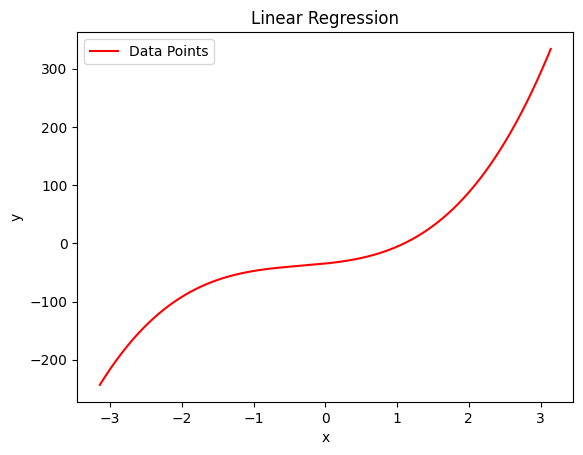

In [ ]:
x = torch.linspace(-math.pi, math.pi,2000)
y = -34.7 + 12.9*x + 8.1145 * x ** 2 + 8 * x ** 3
print(x.shape, y.shape)

plt.plot(x, y, 'r' ,label="Data Points")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.show()

In [ ]:
class CurveFitting:
    def __init__(self):
        self.a = torch.randn(1, requires_grad=True)
        self.b = torch.randn(1, requires_grad=True)
        self.c = torch.randn(1, requires_grad=True)
        self.d = torch.randn(1, requires_grad=True)
        self.lr = 0.001

    def firCurve(self, x, y, epochs=1000):
        print("Before Grad:", self.a.item(), self.b.item(), self.c.item(), self.d.item())
        for epoch in range(epochs):
            y_pred = self.a + self.b * x + self.c * x**2 + self.d * x**3
            loss = ((y_pred - y) ** 2).mean()
            if self.a.grad is not None:
                self.a.grad.zero_()
                self.b.grad.zero_()
                self.c.grad.zero_()
                self.d.grad.zero_()
            loss.backward()
            with torch.no_grad():
                self.a -= self.lr * self.a.grad
                self.b -= self.lr * self.b.grad
                self.c -= self.lr * self.c.grad
                self.d -= self.lr * self.d.grad
        print("After Grad:", self.a.item(), self.b.item(), self.c.item(), self.d.item())


    def predict(self, x):
        y_pred = self.a + self.b * x + self.c * x**2 + self.d * x**3
        return y_pred


In [ ]:
m = CurveFitting()
m.firCurve(x,y)

Before Grad: 0.050187669694423676 -0.9102569818496704 0.24385224282741547 -0.4813055992126465
After Grad: -19.92312240600586 8.505075454711914 5.565243244171143 8.625139236450195


In [ ]:
m.predict(x)

tensor([-259.1493, -258.4306, -257.7133,  ...,  327.2813,  328.2181,
         329.1566], grad_fn=<AddBackward0>)

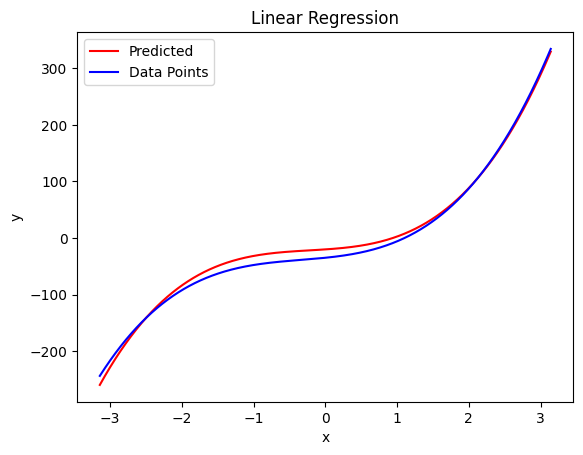

In [ ]:
plt.plot(x, m.predict(x).detach().numpy(), 'r' ,label="Predicted")
plt.plot(x, y, 'b' ,label="Data Points")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.show()

# Observation
---

* using loss.backward() function can help to converge gradient easily .. due to it have some more optimized gradient then us (that we use earlier in lab 1 or 2)

* if learning rate is not choosen properly it can lead to vlaues as NaN (Not a number in python) means it is not converging at that leanrnig rate may be you cna choose some higher nunmber or lower number of learning rate

* it also depends on weight some times changing weights may lead to reduce the loss function more

